# import pandas as pd

In [38]:
taipei_data     = pd.read_csv('A_lvr_land_A.csv')
new_taipei_data = pd.read_csv('F_lvr_land_A.csv')
taichung_data   = pd.read_csv('B_lvr_land_A.csv')
kaohsiung_data  = pd.read_csv('E_lvr_land_A.csv')

taipei_data = taipei_data[1:]
new_taipei_data = new_taipei_data[1:]
taichung_data = taichung_data[1:]
kaohsiung_data = kaohsiung_data[1:]

taipei_data['City'] = 'Taipei'
new_taipei_data['City'] = 'New_Taipei'
taichung_data['City'] = 'Taichung'
kaohsiung_data['City'] = 'Kaohsiung'

C:\Users\Andy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
concat_data = pd.concat([taipei_data, new_taipei_data, taichung_data, kaohsiung_data], axis = 0)
concat_data.head(2)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,City
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei


In [41]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['City','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [42]:
concat_data = concat_data.rename(columns = columns_mapping)
concat_data.head(2)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei


In [43]:
home = concat_data[(concat_data['main_use'] == '住家用') & (concat_data['use_zoning'] == '住')]
home.dropna(axis = 0, how = 'any', subset = analysis_columns)
home.head(2)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei


In [46]:
home = home.astype(columns_type)
home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818 entries, 1 to 12492
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   towns                       7818 non-null   object 
 1   transaction_sign            7818 non-null   object 
 2   house_number                7818 non-null   object 
 3   land_area_square_meter      7818 non-null   object 
 4   use_zoning                  7818 non-null   object 
 5   land_use_district           1 non-null      object 
 6   land_use                    0 non-null      object 
 7   tx_dt                       7818 non-null   object 
 8   transaction_pen_number      7818 non-null   object 
 9   shifting_level              7818 non-null   object 
 10  total_floor_number          7812 non-null   object 
 11  building_state              7818 non-null   object 
 12  main_use                    7818 non-null   object 
 13  main_materials              7817

In [53]:
def year_109(data):
    data = data[:3]
    if data == '109':
        return '109'
    
home['tx_dt_year'] = home['tx_dt'].apply(year_109)
home.head(2)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City,tx_dt_year
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei,109
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei,109


In [58]:
home = home.loc[(home.room_number >= 1) & (home.room_number <= 5) &
               (home.hall_number >= 1) & (home.hall_number <= 2)]
home.head(2)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City,tx_dt_year
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei,109
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei,109


In [59]:
home.reset_index(drop = True)
home.head(2)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City,tx_dt_year
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei,109
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei,109


In [64]:
home['building_area_square_feet'] = home['building_area_square_meter'].apply(lambda x : x * 0.3025)
home['main_building_area_square_feet'] = home['main_building_area'].apply(lambda x : x * 0.3025)
home['unit_price_square_feet'] = home['unit_price'].apply(lambda x : x / 0.3025)
home.head(2)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei,109,69.547775,33.550275,517629.752066
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei,109,11.286275,7.435450,494406.611570


In [65]:
home.describe()

,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6989.000000,6989.000000,6989.000000,6989.000000,6.989000e+03,6989.000000,6989.000000,6989.000000,6989.000000,6989.000000,6989.000000,6.989000e+03
mean,122.446452,2.850909,1.793103,1.739305,1.167462e+07,95309.189154,82.432052,4.860484,5.130193,37.040052,24.935696,3.150717e+05
std,64.345152,0.900347,0.405110,0.691039,1.260670e+07,59646.064258,37.905940,7.763417,6.104493,19.464409,11.466547,1.971771e+05
min,0.970000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,82.960000,2.000000,2.000000,1.000000,5.600000e+06,53625.000000,60.720000,0.000000,0.000000,25.095400,18.367800,1.772727e+05
50%,109.420000,3.000000,2.000000,2.000000,8.600000e+06,79957.000000,79.020000,1.090000,2.960000,33.099550,23.903550,2.643207e+05
75%,148.000000,3.000000,2.000000,2.000000,1.344000e+07,119485.000000,96.010000,8.250000,9.490000,44.770000,29.043025,3.949917e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,437.097375,101.567400,2.016873e+06


In [71]:
'''
min欄位中，health_number、total_price、unit_price、main_building_area、auxiliary_building_area、
balcony_area、main_building_area_square_feet、unit_price_square_feet都為0，故檢視一下這些數據
'''
home.drop(home[home['total_price'] == 0].index, inplace = True)
home.drop(home[home['unit_price'] == 0].index, inplace = True)
home.drop(home[home['main_building_area'] == 0].index, inplace = True)
home.describe()

,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6928.000000,6928.000000,6928.000000,6928.000000,6.928000e+03,6928.000000,6928.000000,6928.000000,6928.000000,6928.000000,6928.000000,6.928000e+03
mean,122.578131,2.850606,1.793158,1.739463,1.171803e+07,95531.270208,82.940253,4.889654,5.163217,37.079885,25.089426,3.158059e+05
std,64.366580,0.900121,0.405070,0.691127,1.264725e+07,59753.228933,37.507319,7.777281,6.113188,19.470891,11.345964,1.975313e+05
min,7.440000,1.000000,1.000000,0.000000,4.100000e+05,3239.000000,7.440000,0.000000,0.000000,2.250600,2.250600,1.070744e+04
25%,83.067500,2.000000,2.000000,1.000000,5.600000e+06,53693.250000,61.070000,0.000000,0.000000,25.127919,18.473675,1.774983e+05
50%,109.505000,3.000000,2.000000,2.000000,8.600000e+06,80200.000000,79.200000,1.150000,3.080000,33.125262,23.958000,2.651240e+05
75%,148.000000,3.000000,2.000000,2.000000,1.350000e+07,119886.500000,96.177500,8.322500,9.540000,44.770000,29.093694,3.963190e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,437.097375,101.567400,2.016873e+06


In [76]:
home[home['City'] == 'Taipei'].corr(method ='pearson')[['total_price', 'unit_price_square_feet']]

,total_price,unit_price_square_feet
building_area_square_meter,0.883899,0.293204
room_number,0.303435,-0.094511
hall_number,0.267859,0.017770
health_number,0.640136,0.191842
total_price,1.000000,0.619278
unit_price,0.619278,1.000000
main_building_area,0.734402,0.175287
auxiliary_building_area,0.189865,0.062841
balcony_area,0.492222,0.062414
building_area_square_feet,0.883899,0.293204


<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='City'>

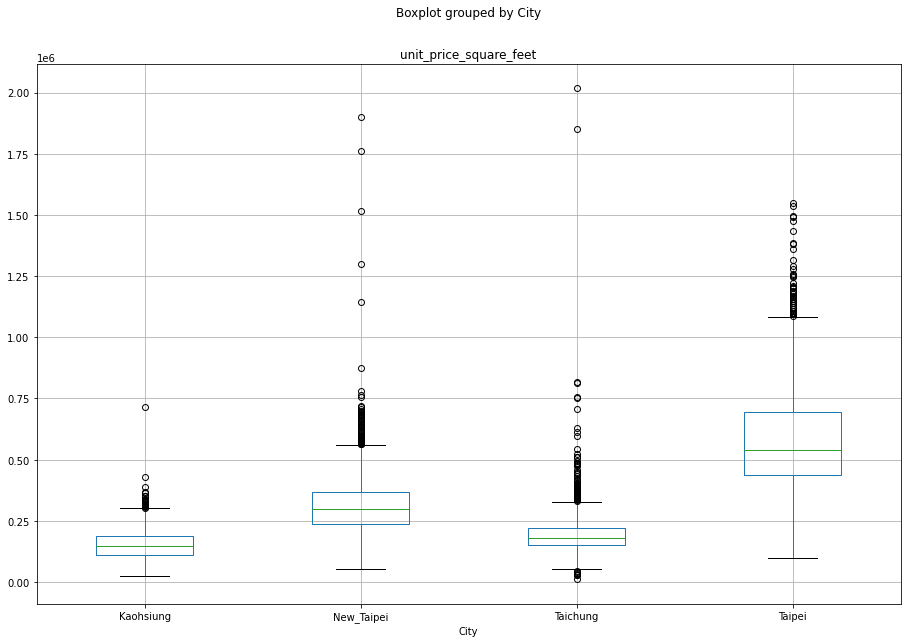

In [80]:
home.boxplot(column = ['unit_price_square_feet'], by = 'City', figsize = (15, 10))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

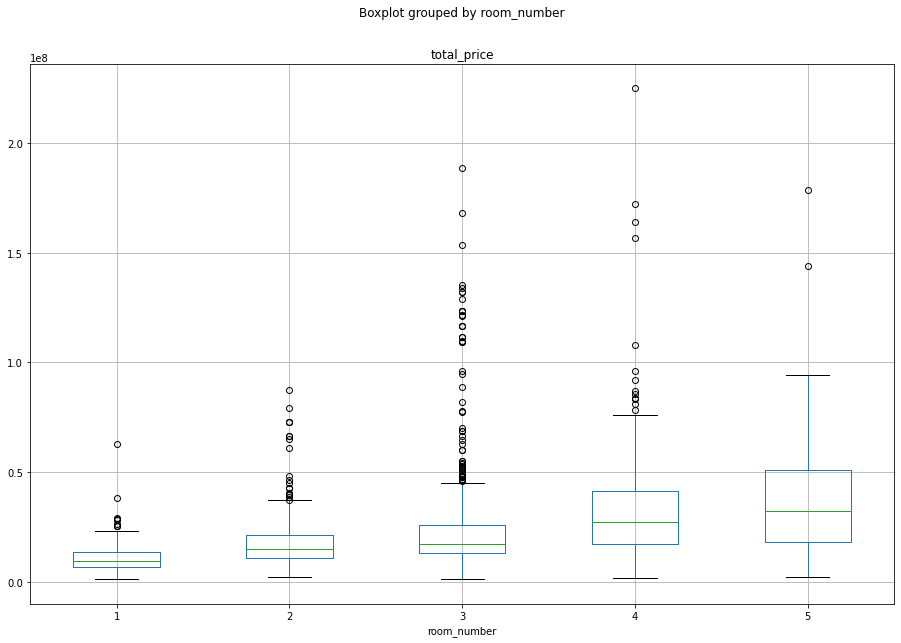

In [82]:
home[home['City'] == 'Taipei'].boxplot(column = ['total_price'], by = 'room_number', figsize = (15, 10))

In [88]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder().fit(home['towns'].values)
home['Label_towns'] = label.transform(home['towns'].values)
home[['Label_towns', 'towns']]

,Label_towns,towns
1,39,文山區
2,39,文山區
5,39,文山區
7,39,文山區
8,39,文山區
...,...,...
10589,79,路竹區
11925,79,路竹區
12019,79,路竹區
12236,71,茄萣區


<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='Label_towns'>

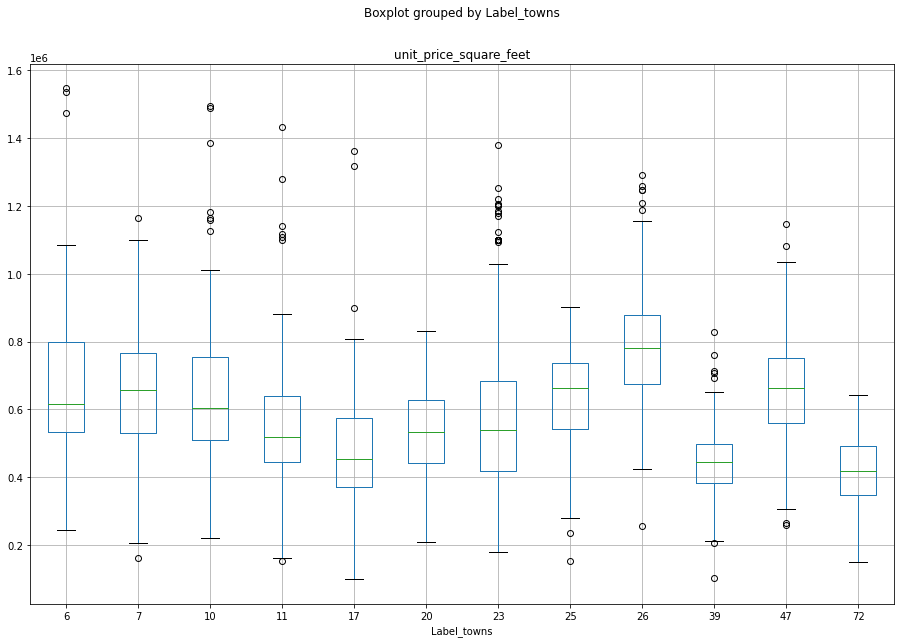

In [89]:
home[home['City'] == 'Taipei'].boxplot(column = ['unit_price_square_feet'], by = 'Label_towns', figsize = (15, 10))

In [91]:
label.inverse_transform([6])

array(['中山區'], dtype=object)